In [1]:
#!pip install dash

In [3]:
import numpy as np # data analysis
import pandas as pd # mathematical functions,vectors
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap
import dash
from dash import dcc, html
import plotly.express as px

from sklearn.preprocessing import StandardScaler # to standardization
from sklearn.model_selection import train_test_split, GridSearchCV # to select best KNN parameters
from sklearn.metrics import accuracy_score, confusion_matrix # to learn where did we wrong
#from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
    

In [24]:
data = pd.read_csv("data.csv")

In [ ]:
data.head(10)

In [ ]:
data.columns


In [25]:
data.drop(["id","Unnamed: 32"], inplace = True, axis = 1) # inplace: save after drop, axis = 1: drop as column

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data = data.rename(columns = {"diagnosis":"target"})

In [6]:
data.target = [1 if each.strip() == "M" else 0 for each in data.target] 

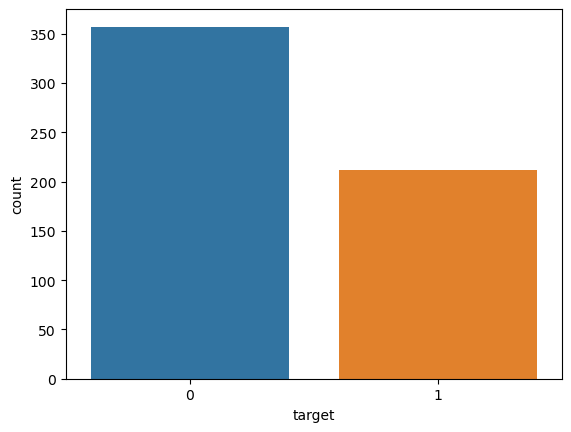

In [7]:
sns.countplot(x = data.target)
plt.show()

In [ ]:
data.info()

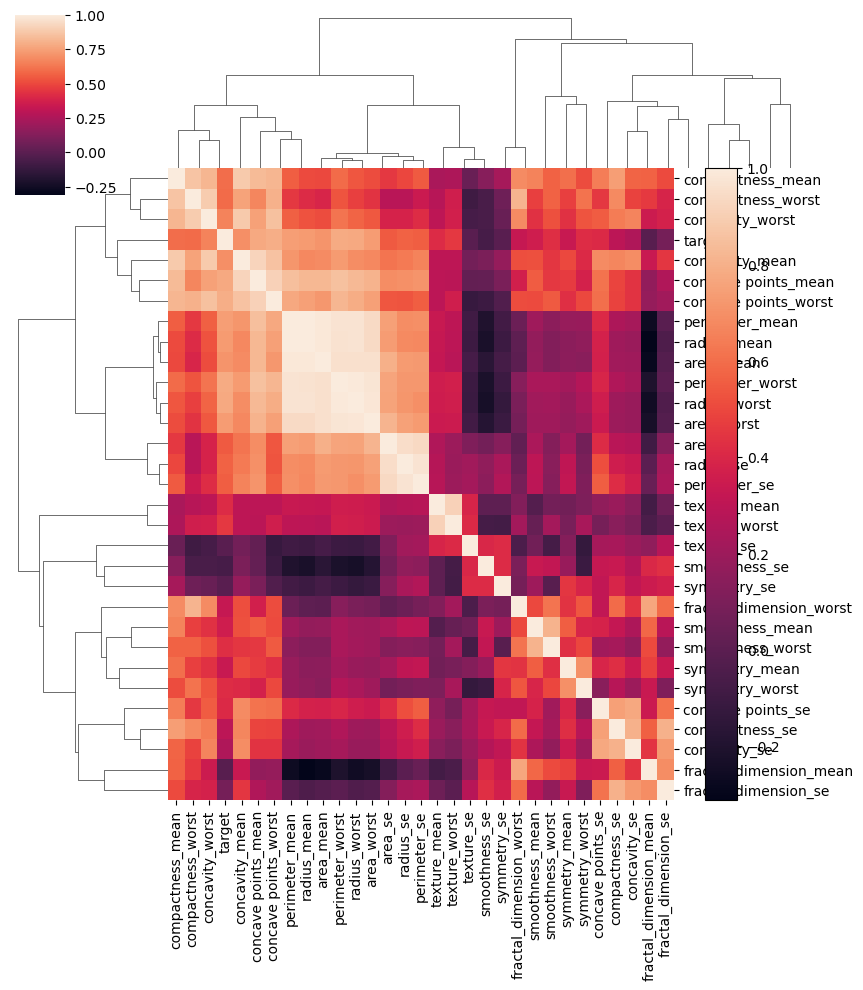

In [8]:
corr_matrix = data.corr()

# Create the cluster map for the full correlation matrix
cluster_map = sns.clustermap(corr_matrix, annot=False, fmt=".2f", figsize=(10, 10))

# Get the mappable object from the cluster map
mappable = cluster_map.ax_heatmap.collections[0]

# Show the colorbar using the mappable object
plt.colorbar(mappable)

# Display the cluster map
plt.show()

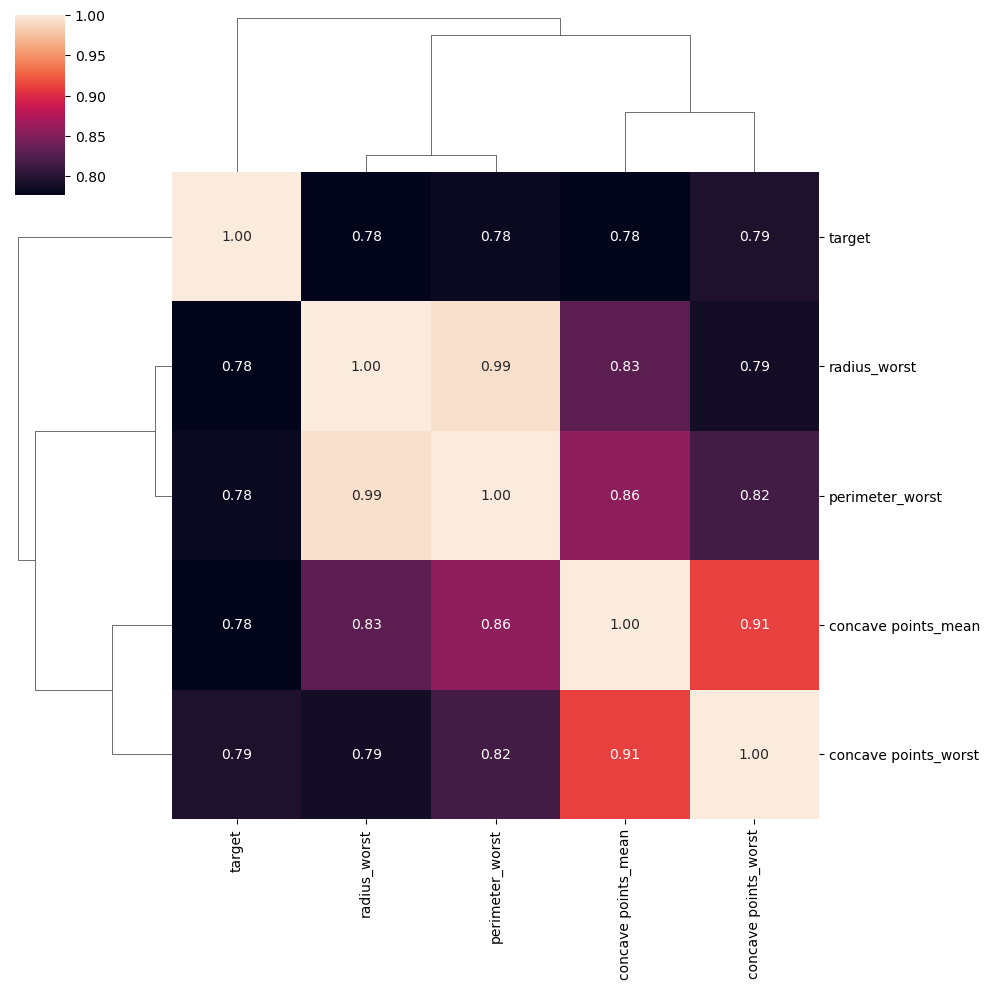

In [9]:
corr_matrix = data.corr()
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()

# Check if all the column names in corr_features actually exist in the data DataFrame
corr_features = [feat for feat in corr_features if feat in data.columns]

if corr_features:
    # Create a subset of the DataFrame with the selected correlated features
    subset_data = data[corr_features]

    # Check if the subset_data DataFrame has enough observations to create the cluster map
    if len(subset_data) > 1:
        sns.clustermap(subset_data.corr(), annot=True, fmt=".2f", figsize=(10, 10))
        plt.show()
    else:
        print("Not enough observations to create the cluster map.")
else:
    print("No correlated features found based on the specified threshold.")

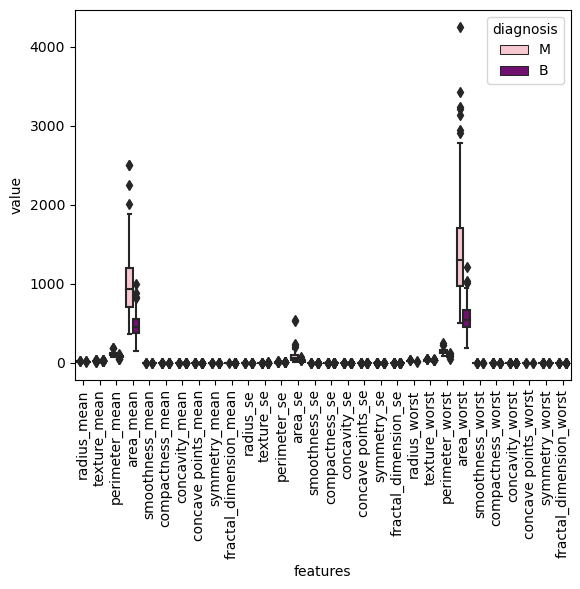

In [27]:
data_melted = pd.melt(data,id_vars = "diagnosis",
                   var_name = "features",
                   value_name = "value")
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted, palette=['pink', 'purple'])
plt.xticks(rotation = 90)
plt.show()
#the features have different values so we need to normalise them

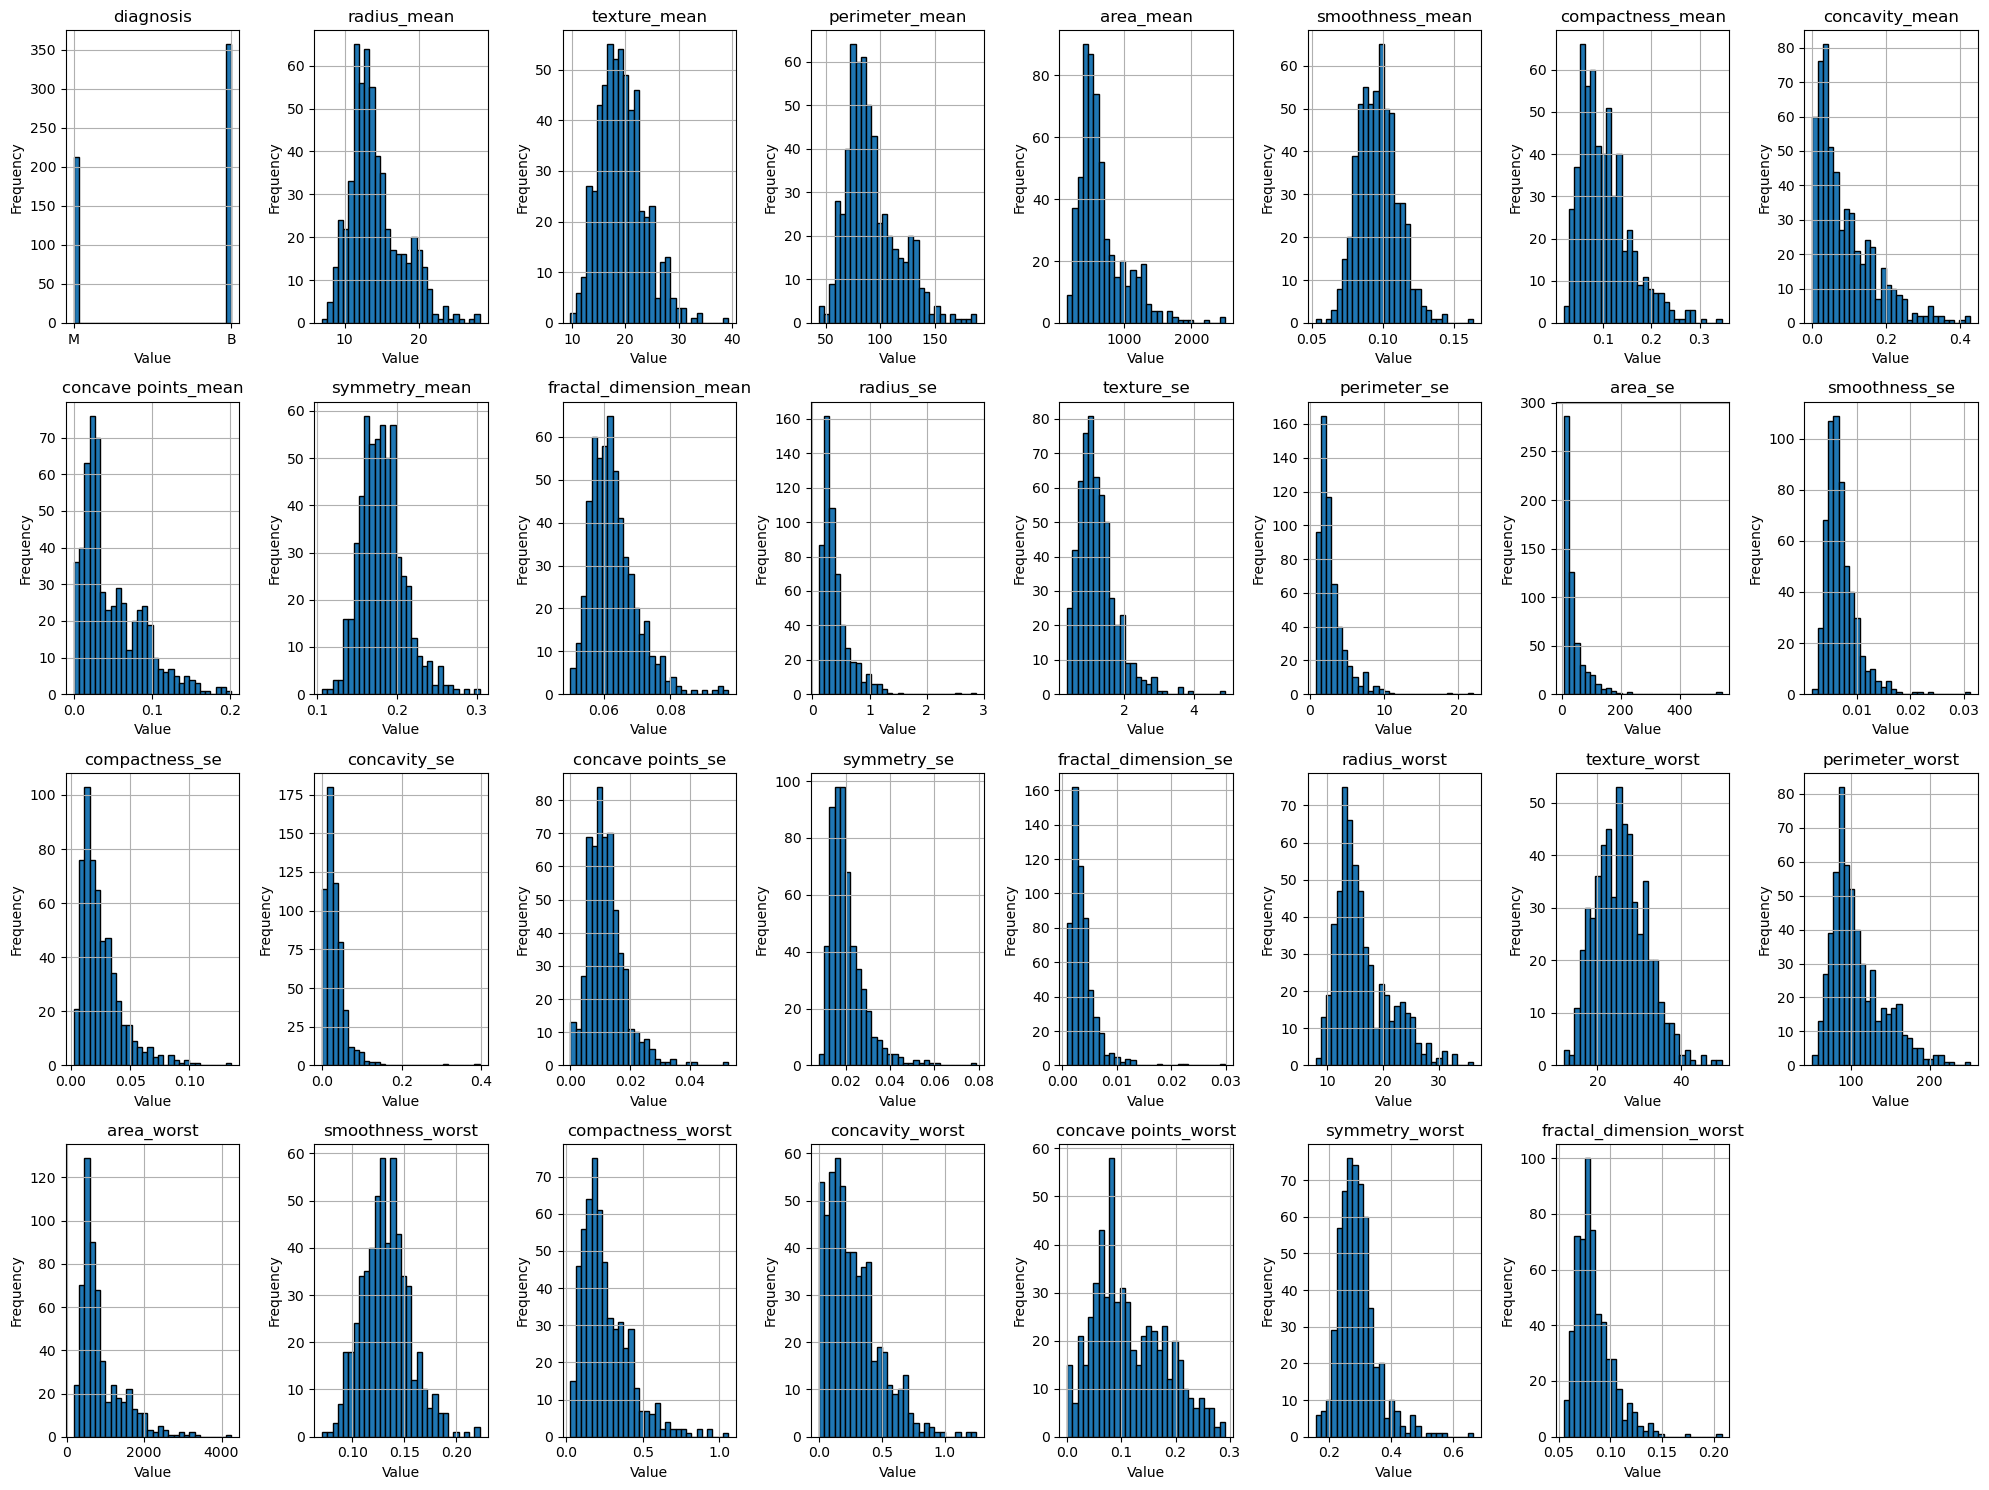

In [15]:
columns = data.columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = 4
num_cols = 8

# Calculate the total number of subplots
total_subplots = len(columns)

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Loop through each column and plot its distribution
for i, column in enumerate(columns):
    data[column].hist(bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(total_subplots, num_rows * num_cols):
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

TypeError: Could not convert MMMMMMMMMMMMMMMMMMMBBBMMMMMMMMMMMMMMMBMMMMMMMMBMBBBBBMMBMMBBBBMBMMBBBBMBMMBMBMMBBBMMBMMMBBBMBBMMBBBMMBBBBMBBMBBBBBBBBMMMBMMBBBMMBMBMMBMMBBMBBMBBBBMBBBBBBBBBMBBBBMMBMBBMMBBMMBBBBMBBMMMBMBMBBBMBBMMBMMMMBMMMBMBMBBMBMMMMBBMMBBBMBBBBBMMBBMBBMMBMBBBBMBBBBBMBMMMMMMMMMMMMMMBBBBBBMBMBBMBBMBMMBBBBBBBBBBBBBMBBMBMBBBBBBBBBBBBBBMBBBMBMBBBBMMMBBBBMBMBMBBBMBBBBBBBMMMBBBBBBBBBBBMMBMMMBMMBBBBBMBBBBBMBBBMBBMMBBBBBBMBBBBBBBMBBBBBMBBMBBBBBBBBBBBBMBMMBMBBBBBMBBMBMBBMBMBBBBBBBBMMBBBBBBMBBBBBBBBBBMBBBBBBBMBMBBMBBBBBMMBMBMBBBBBMBBMBMBMMBBBMBBBBBBBBBBBMBMMBBBBBBBBBBBBBBBBBBBBBBBBBMMMMMMB to numeric

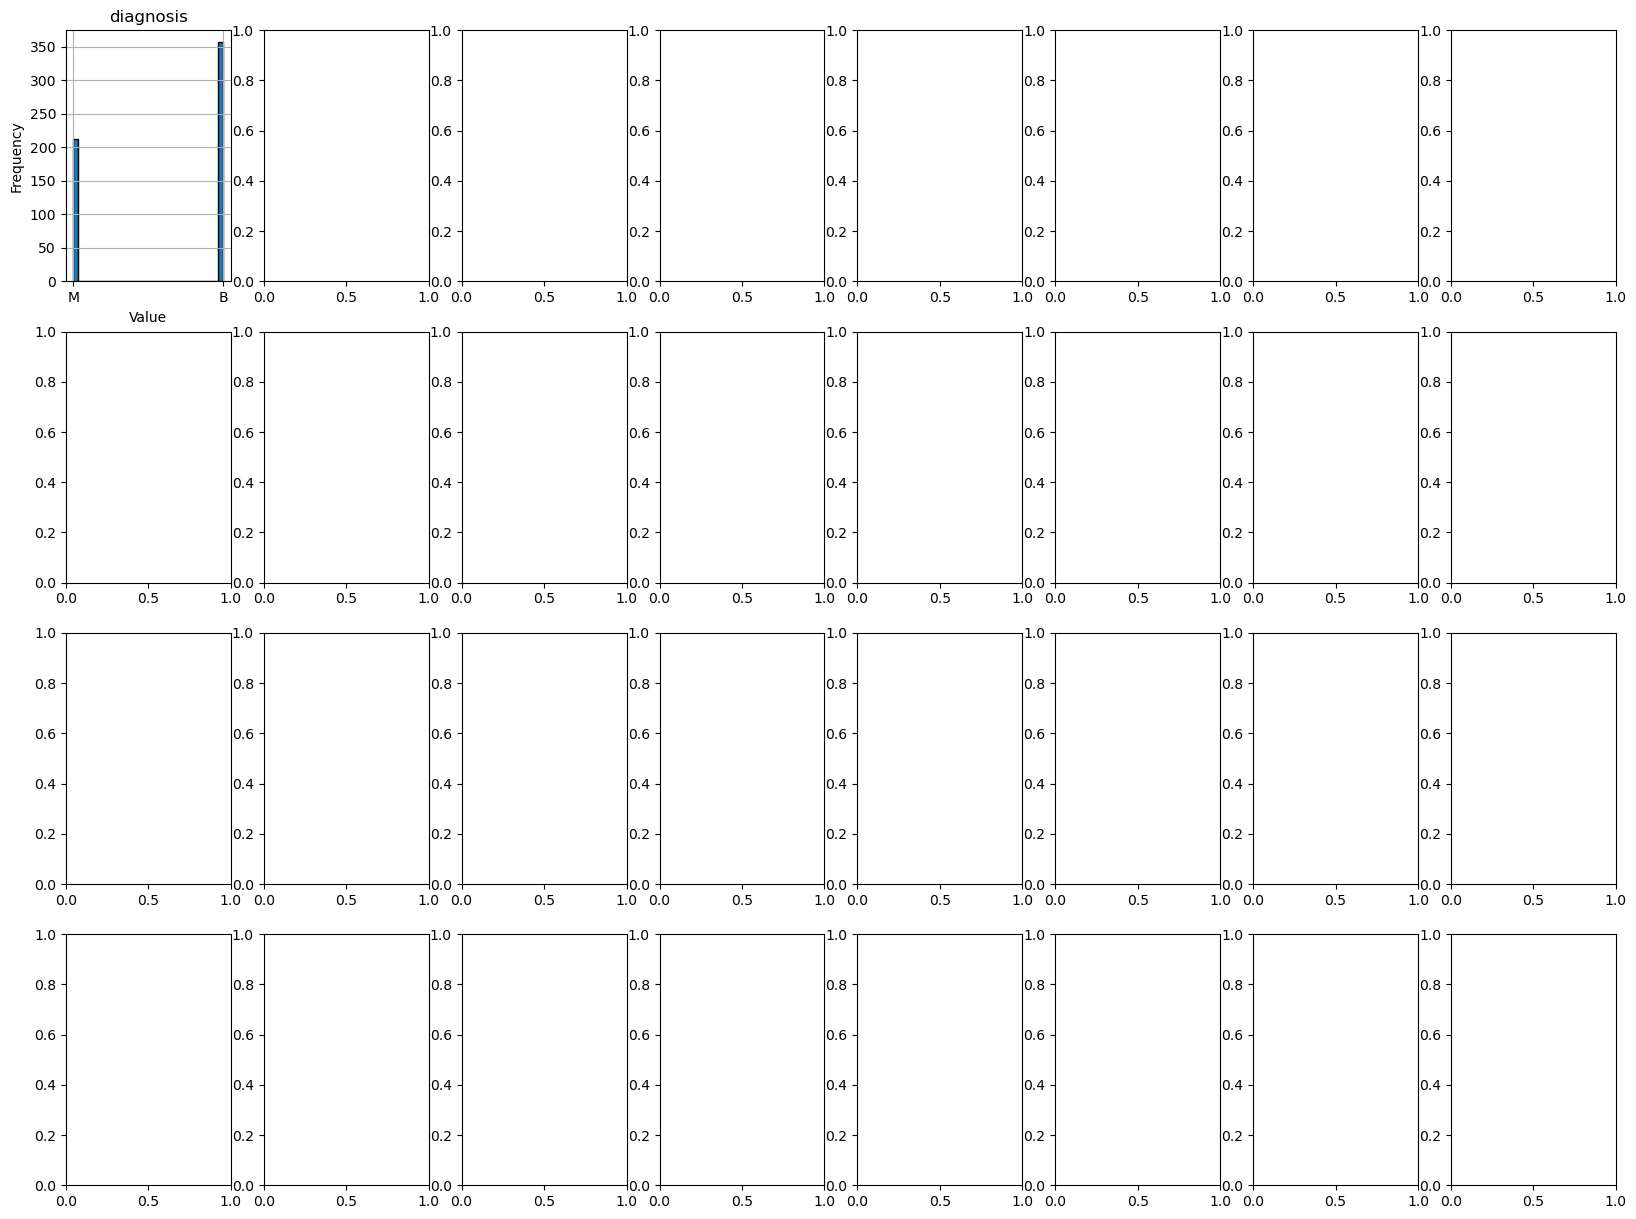

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the DataFrame data.
# If not, you can load your dataset here.

# Get the list of column names
columns = data.columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = 4
num_cols = 8

# Calculate the total number of subplots
total_subplots = len(columns)

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Loop through each column and plot its distribution
for i, column in enumerate(columns):
    data[column].hist(bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
    # Compute basic properties of each distribution
    mean_val = data[column].mean()
    variance_val = data[column].var()
    std_dev_val = data[column].std()
    
    # Add text to the subplot with the computed properties
    axes[i].text(0.65, 0.9, f"Mean: {mean_val:.2f}", transform=axes[i].transAxes, fontsize=10)
    axes[i].text(0.65, 0.85, f"Variance: {variance_val:.2f}", transform=axes[i].transAxes, fontsize=10)
    axes[i].text(0.65, 0.8, f"Std Dev: {std_dev_val:.2f}", transform=axes[i].transAxes, fontsize=10)

# Hide any empty subplots
for i in range(total_subplots, num_rows * num_cols):
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Read the dataset
data = pd.read_csv("data.csv")

# Convert 'diagnosis' column to numeric values (0 for 'B' and 1 for 'M')
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = data.drop(['diagnosis', 'id'], axis=1)  # Drop 'diagnosis' and 'id' columns as features
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Logistic Regression Model Performance:")
print("-------------------------------------")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)



Logistic Regression Model Performance:
-------------------------------------
Accuracy: 0.9707602339181286

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion Matrix:
[[107   1]
 [  4  59]]


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv("data.csv")

# Convert 'diagnosis' column to numeric values (0 for 'B' and 1 for 'M')
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = data.drop(['diagnosis', 'id'], axis=1)  # Drop 'diagnosis' and 'id' columns as features
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_imputed)
X_test_standardized = scaler.transform(X_test_imputed)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_standardized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Logistic Regression Model Performance:")
print("-------------------------------------")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)



Logistic Regression Model Performance:
-------------------------------------
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix:
[[106   2]
 [  1  62]]


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv("data.csv")

# Convert 'diagnosis' column to numeric values (0 for 'B' and 1 for 'M')
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = data.drop(['diagnosis', 'id'], axis=1)  # Drop 'diagnosis' and 'id' columns as features
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_imputed)
X_test_standardized = scaler.transform(X_test_imputed)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_standardized, y_train)

# Make predictions on the test set (convert probability to binary)
y_pred_prob = model.predict(X_test_standardized)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Minimal Regression Model Performance:")
print("-------------------------------------")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)


Minimal Regression Model Performance:
-------------------------------------
Accuracy: 0.9532163742690059

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix:
[[106   2]
 [  6  57]]


In [20]:
def plotCorrelationMatrix(df, graphWidth):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=[float, int])

    if numeric_df.shape[1] < 2:
        print("No correlation plots shown: There are not enough numeric features.")
        return

    # Drop columns with NaN values
    numeric_df = numeric_df.dropna(axis='columns')

    # Keep columns where there are more than 1 unique values
    numeric_df = numeric_df[[col for col in numeric_df if numeric_df[col].nunique() > 1]]

    # Calculate the correlation matrix
    corr = numeric_df.corr()

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()



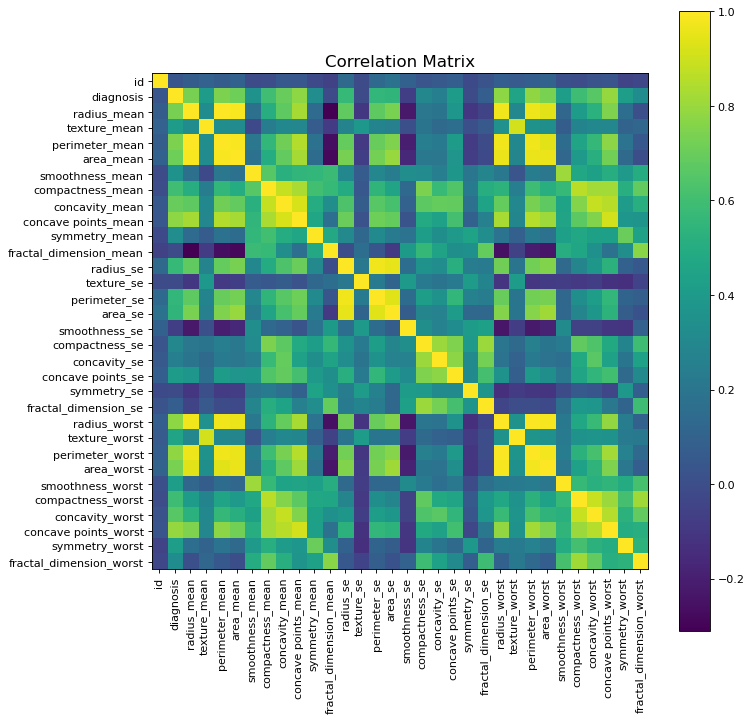

In [21]:
plotCorrelationMatrix(data, 10)

In [22]:
def plotCorrelationMatrix2(df, graphWidth):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=[float, int])

    if numeric_df.shape[1] < 2:
        print("No correlation plots shown: There are not enough numeric features.")
        return

    # Drop columns with NaN values
    numeric_df = numeric_df.dropna(axis='columns')

    # Keep columns where there are more than 1 unique values
    numeric_df = numeric_df[[col for col in numeric_df if numeric_df[col].nunique() > 1]]

    # Calculate the correlation matrix
    corr = numeric_df.corr()

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    sns.heatmap(corr, cmap='RdPu', annot=False, fmt=".2f", linewidths=0.5)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=8)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


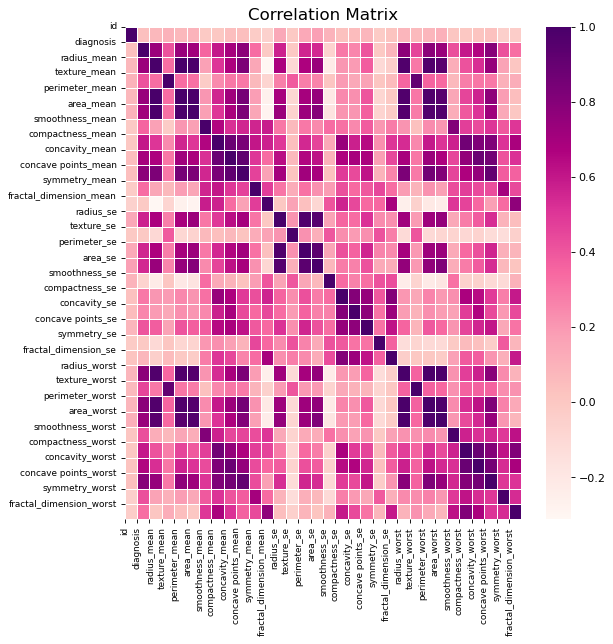

In [23]:
plotCorrelationMatrix2(data, 8)

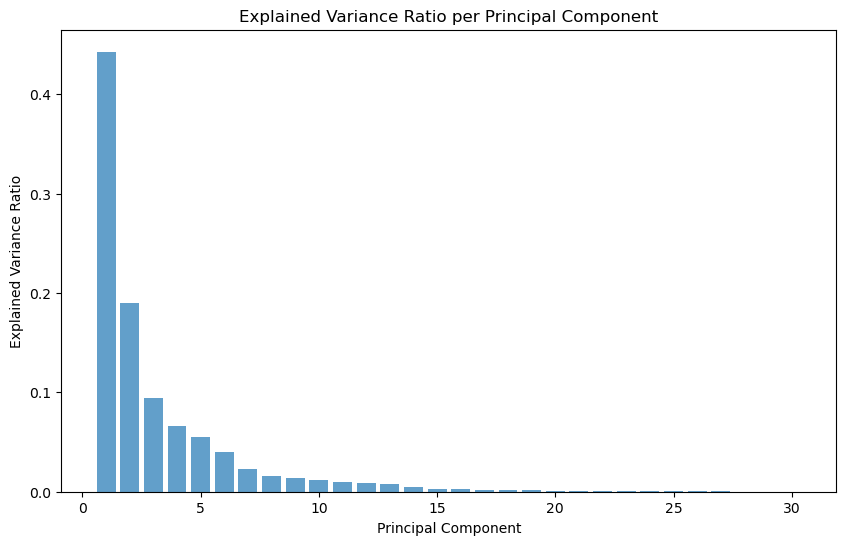

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")

# Separate features from the target variable
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("data.csv")

# Separate features from the target variable
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform PCA
n_components = 5  # Number of top principal components to retain
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the regression model: {accuracy:.2f}")


Accuracy of the regression model: 0.98


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("data.csv")

# Separate features from the target variable
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform PCA
n_components = 5  # Number of top principal components to retain
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the classification model: {accuracy:.2f}")

# Print additional information
print("Minimal Classification Model Performance:")
print("----------------------------------------")
print("Accuracy:", accuracy)

# Classification Report
classification_report_str = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_report_str)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy of the classification model: 0.98
Minimal Classification Model Performance:
----------------------------------------
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[70  1]
 [ 1 42]]


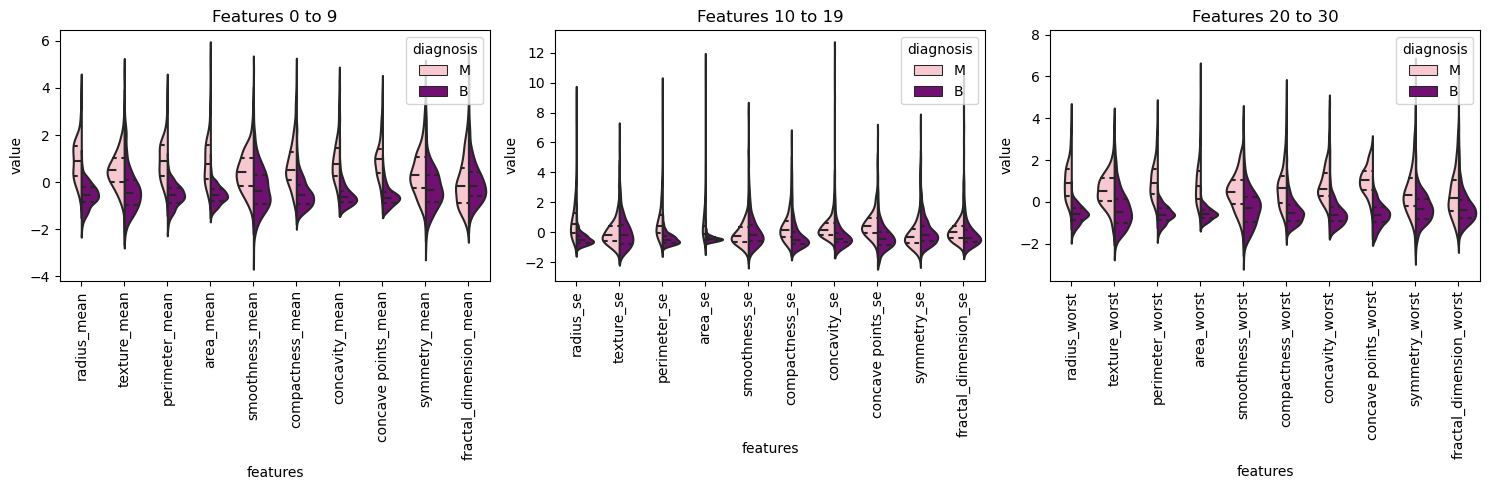

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data.csv")
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list, axis=1)

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())

# Creating subplots horizontally
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through three sets of features
for i, feature_range in enumerate([(0, 10), (10, 20), (20, 31)]):
    start_idx, end_idx = feature_range

    data_subset = pd.concat([y, data_n_2.iloc[:, start_idx:end_idx]], axis=1)

    data_melted = pd.melt(data_subset, id_vars="diagnosis",
                          var_name="features",
                          value_name='value')

    sns.violinplot(ax=axes[i], x="features", y="value", hue="diagnosis", data=data_melted, split=True, inner="quart", palette=['pink', 'purple'])
    axes[i].set_title(f'Features {start_idx} to {end_idx - 1}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Read the dataset
data = pd.read_csv("data.csv")


# Create the Dash app
app = dash.Dash(__name__)

# Dropdown options
feature_options = [{'label': feature, 'value': feature} for feature in data.columns[2:-1]]

# Layout of the app
app.layout = html.Div([
    html.H1("Breast Cancer Data Dashboard"),
    html.P("The goal is to build a model that can predict whether a tumor is malignant - M (cancerous) or benign - B (non-cancerous) based on various features extracted from medical images of the tumor."),

    # Dropdown to select the feature
    dcc.Dropdown(
        id='feature-dropdown',
        options=feature_options,
        value=data.columns[2],  # Default value for the dropdown
        style={'width': '50%'}
    ),

    # Chart to show the distribution and correlation
    dcc.Graph(id='feature-plot'),

    # Correlation matrix plot
    html.H2("Correlation Matrix"),
    dcc.Graph(id='correlation-matrix-plot'),

    # Histogram of 'echo' feature distribution with mean, variance, and standard error
    dcc.Graph(id='echo-histogram'),

    # Box plot of selected feature
    dcc.Graph(id='box-plot'),

    # Violin plot of selected feature with both diagnoses
    dcc.Graph(id='violin-plot'),
])

# Callback to update the chart based on the selected feature
@app.callback(
    [Output('feature-plot', 'figure'),
     Output('echo-histogram', 'figure'),
     Output('box-plot', 'figure'),
     Output('violin-plot', 'figure')],
    [Input('feature-dropdown', 'value')]
)
def update_plots(selected_feature):
    fig1 = px.histogram(data, x=selected_feature, color='diagnosis', barmode='overlay', nbins=100,
                        category_orders={'diagnosis': [0, 1]}, color_discrete_map={0: 'blue', 1: 'red'})
    fig1.update_layout(title=f"Distribution of {selected_feature} and Correlation with Diagnosis",
                       xaxis_title=selected_feature,
                       yaxis_title="Count",
                       showlegend=True)

    # Calculate mean, variance, and standard error of the selected feature
    mean_val = data[selected_feature].mean()
    variance_val = data[selected_feature].var()
    std_err_val = data[selected_feature].sem()

    # Create histogram plot for the selected feature
    fig2 = go.Figure()
    fig2.add_trace(go.Histogram(x=data[selected_feature], nbinsx=50, histnorm='probability', name='Distribution'))
    fig2.add_trace(go.Scatter(x=[mean_val, mean_val], y=[0, 0.15], mode='lines', name='Mean',
                              line=dict(color='red', dash='dash')))
    fig2.add_trace(go.Scatter(x=[mean_val - std_err_val, mean_val + std_err_val], y=[0.05, 0.05], mode='lines',
                              fill='tozeroy', fillcolor='rgba(255, 0, 0, 0.3)', name='Standard Error'))
    fig2.update_layout(title=f"{selected_feature} Distribution with Mean, Variance, and Standard Error",
                       xaxis_title=selected_feature,
                       yaxis_title="Probability",
                       showlegend=True)

    # Create box plot for the selected feature
    fig3 = px.box(data, x='diagnosis', y=selected_feature, color='diagnosis', points='all')
    fig3.update_layout(title=f"Box Plot of {selected_feature} by Diagnosis",
                       xaxis_title='Diagnosis',
                       yaxis_title=selected_feature,
                       showlegend=False)

    # Merge the data for both diagnoses for the violin plot
    violin_data = pd.melt(data, id_vars="diagnosis", value_vars=selected_feature)

    # Create violin plot for the selected feature with both diagnoses
    fig4 = px.violin(violin_data, x='diagnosis', y='value', color='diagnosis', box=True, points="all",
                     hover_data=violin_data.columns, category_orders={'diagnosis': ['M', 'B']},
                     color_discrete_map={'M': 'red', 'B': 'blue'})

    fig4.update_layout(title=f"Violin Plot of {selected_feature} by Diagnosis",
                       xaxis_title='Diagnosis',
                       yaxis_title=selected_feature,
                       showlegend=False)

    # Set stripmode to 'overlay' to show data points for both diagnoses on the violin plot
    fig4.update_traces(marker=dict(size=4, opacity=0.6, line=dict(width=0.5)),
                        selector=dict(mode='markers'),
                        box_visible=True)

    return fig1, fig2, fig3, fig4

# Callback to update the correlation matrix plot
@app.callback(
    Output('correlation-matrix-plot', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_correlation_matrix(selected_feature):
    # Select only numeric columns for correlation calculation
    numeric_df = data.select_dtypes(include=[float, int])

    # Drop columns with NaN values
    numeric_df = numeric_df.dropna(axis='columns')

    # Keep columns where there are more than 1 unique values
    numeric_df = numeric_df[[col for col in numeric_df if col != 'id' and numeric_df[col].nunique() > 1]]

    # Calculate the correlation matrix
    corr = numeric_df.corr()

    fig = go.Figure(data=go.Heatmap(z=corr.values,
                                    x=corr.columns,
                                    y=corr.columns,
                                    colorscale='RdPu',
                                    zmin=-1,
                                    zmax=1))
    fig.update_layout(title=f'Correlation Matrix',
                      xaxis_title='Features',
                      yaxis_title='Features',
                      width=800,
                      height=800)
    return fig

if __name__ == '__main__':
    app.run_server(host='0.0.0.0', port=8060, debug=True)


In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the dataset
data = pd.read_csv("data.csv")

# Preprocessing
y = data.diagnosis
columns_to_drop = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(columns_to_drop, axis=1)

data_dia = y
data = x
data_n_2 = (data - data.mean()) / data.std()
data = pd.concat([y, data_n_2.iloc[:,:]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

# Create the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Breast Cancer Data Dashboard"),

    # Dropdown to select the feature
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in data['features'].unique()],
        value=data['features'].iloc[0]
    ),

    dcc.Graph(
        id='violin-plot'
    ),
])

# Callback to update the violin plot
@app.callback(
    Output('violin-plot', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_violin_plot(selected_feature):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 10))
    violin_plot = sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")

    figure = go.Figure()
    for idx, violin in enumerate(violin_plot.collections):
        x = violin.get_paths()[0].vertices[:, 0]
        y = violin.get_paths()[0].vertices[:, 1]
        figure.add_trace(go.Scatter(x=x, y=y, mode='lines', line=go.scatter.Line(color="black"), fill="toself"))
    
    figure.update_layout(title=f"Violin Plot of {selected_feature} by Diagnosis",
                         xaxis_title="Features",
                         yaxis_title="Value",
                         xaxis_tickangle=-45,
                         showlegend=True)

    return figure


# Run the app
if __name__ == '__main__':
    app.run_server(port=8070, debug=True)



In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64

# Read the dataset
data = pd.read_csv("data.csv")

# Preprocessing
y = data.diagnosis
list_to_drop = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list_to_drop, axis=1)

data_dia = y
data = x
data_n_2 = (data - data.mean()) / data.std()
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

# Create the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Breast Cancer Data Dashboard"),
    
    # Embed the image of the graph using base64 encoding
    html.Img(id='graph-image', style={'width': '100%'}),
])

# Update the image of the graph using a callback
@app.callback(
    Output('graph-image', 'src'),
    [Input('graph-image', 'id')]
)
def update_graph_image(_):
    plt.figure(figsize=(10, 10))
    sns.set(style="whitegrid")
    sns_plot = sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
    plt.xticks(rotation=90)
    
    # Convert the Matplotlib plot to an image in base64 format
    img_stream = io.BytesIO()
    sns_plot.figure.savefig(img_stream, format='png')
    img_data = base64.b64encode(img_stream.getvalue()).decode('utf-8')
    
    return f'data:image/png;base64,{img_data}'

# Run the app
if __name__ == '__main__':
    app.run_server(port=8070, debug=True)


In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("data.csv")

# Preprocessing
y = data.diagnosis
list_to_drop = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list_to_drop, axis=1)

data_dia = y
data = x
data_n_2 = (data - data.mean()) / data.std()
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

# Create the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Breast Cancer Data Dashboard"),
    
    # Div to display the graph
    dcc.Graph(id='violin-plot'),

    # Interval to refresh the graph periodically
    dcc.Interval(
        id='graph-interval',
        interval=10*1000,  # Refresh every 10 seconds
        n_intervals=0
    ),
])

# Callback to update the graph
@app.callback(
    Output('violin-plot', 'figure'),
    [Input('graph-interval', 'n_intervals')]
)
def update_violin_plot(n_intervals):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 10))
    
    figure = go.Figure()
    for feature in data['features'].unique():
        feature_data = data[data['features'] == feature]
        violin_plot = sns.violinplot(x="diagnosis", y="value", data=feature_data, split=True, inner="quart")
        
        for idx, violin in enumerate(violin_plot.collections):
            x = violin.get_paths()[0].vertices[:, 0]
            y = violin.get_paths()[0].vertices[:, 1]
            figure.add_trace(go.Scatter(x=x, y=y, mode='lines', line=go.scatter.Line(color="black"), fill="toself",
                                        name=feature, legendgroup=feature))
    
    figure.update_layout(title="Violin Plot by Diagnosis",
                         xaxis_title="Diagnosis",
                         yaxis_title="Value",
                         xaxis_tickangle=-45,
                         showlegend=True)

    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(port=8070, debug=True)

